# Risk profiles of put option buyer and seller
Buying a put option gives you the right, but not the obligation to sell the underlying security at the given strike price, within a specific time period. Therefore a put option payoff at expiration depends on where the underlying price is relative to the put option strike price.

In this notebook, we will plot a put buyer's and a put seller's payoff graph for a 900 strike price put on the Infosys stock.

### Import Libraries 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

#for making attractive and informative statistical graphs 
plt.style.use('seaborn-darkgrid')

## Put payoff
We define a function put_payoff that calculates the payoff from buying a put option. The function takes sT which is a range of possible values of the stock price at expiration, the strike price of the put option and the premium of the put option as input.

It returns a numpy array containing the profit from put option for different stock prices. When the stock price is less than the strike price, the profit is measured as the difference between strike price and stock price, and when the stock price is greater than the strike price then the profit is zero. After this, a put premium is deducted from the pnl to compute the payoff.

In [10]:
#Payoff function 
def put_payoff(sT, strike_price, premium):
    pnl = np.where(sT<strike_price, strike_price - sT, 0)
    return pnl -premium 

## Define parameters

We will define the spot, price, the strike price, premium, and a range of possible values for the infosys stock price at expiration. 

In [11]:
# Infosys stock price
spot_price = 900

# Put stike price and cost 
strike_price = 900
premium = 20 

#Stock price range at the expiration of the put
# we have defined range for the stock price at expiry as +/- 10% from spot price
# Syntax: numpy.arange(start price, stop price)
sT = np.arange(0.9*spot_price, 1.1*spot_price)

## Put Option Buyer Payoff 

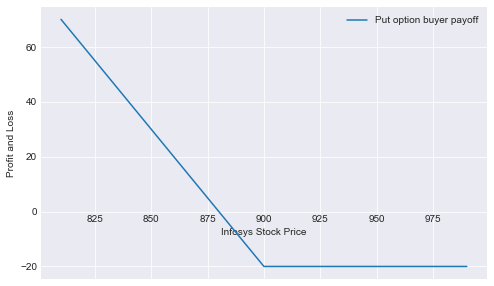

In [12]:
payoff_long_put = put_payoff(sT, strike_price, premium)

#Plot the graph 
fig, ax = plt.subplots(figsize = (8, 5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_long_put, label= 'Put option buyer payoff')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()

So what do you observe?

1. Even if the price of Infosys goes above the strike price of 900, the max loss seems to be just INR 20/-. Therefore, the loss to the put option buyer is restricted to the extent of the premium he has paid. 
2. The profit from this put option seem to increase linearly as and when Infosys start to move below the strike price of 900. Therefore, the lower the spot price goes the higher will be the profit. 
3. Through the put option is supposed to make a profit when the spot price moves below the strike price, the put option buyer first needs to recover the premium he has paid. 

For the above points, we can say that the buyer of the put option has limited risk and potential to make huge profit. 

## Put Option Seller Profit 
To get the payoff graph for option seller, we have multiplied the payoff to option buyer by -1.0, as the option buyer makes the profit, the option seller will lose the exact same amount and vice versa. 

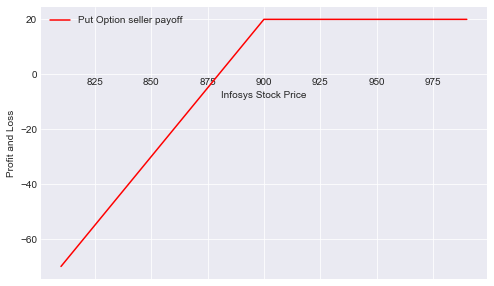

In [16]:
payoff_short_put = payoff_long_put * -1.0
#plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.spines['bottom'].set_position('zero')
ax.plot(sT, payoff_short_put, label= 'Put Option seller payoff', color= 'r')
plt.xlabel('Infosys Stock Price')
plt.ylabel('Profit and Loss')
plt.legend()
plt.show()

The put options seller payoff looks like a mirror image of the put option buyer payoff. 

1. The profit is resticted to INR 20/- as long as the spot price is trading at any price above the strike price of 900. 
2. From 900 to 880, we can see the profits getting reduced. 
3. Below 880, the put option seller starts losing money. The losses increase with a decrease in stock price. 

Therefore, you sell a put option only when your view is that the underlying asset will not fall beyond the strike price. 